In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from network_model import *
from data import *

In [2]:
train_data = get_data()

x_train_org = train_data.loc[:, ['Avg_Temp_Pre_Day', 'Sum_Fall']].to_numpy()
x_train_org = np.reshape(x_train_org, (np.shape(x_train_org)[0], 2))
y_train_org = train_data.loc[:, ['Avg_Temp', 'Sum_Fall']].to_numpy()
y_train_org = np.reshape(y_train_org, (np.shape(y_train_org)[0], 2))
x_train = standardize(x_train_org, x_train_org)
y_train = standardize(y_train_org, y_train_org)

network = NeuralNetwork(x_train[0:7].T, y_train[7], 2)

In [3]:
y_output = np.zeros(len(x_train)-7)
y_pred = np.zeros(len(x_train)-7)
for i in range(len(x_train)-7):
    network.train(x_train[i:i+7].T, y_train[i+7])
    y_output[i] = y_train[i+7][0]
    y_pred[i] = network.output[0][0]

print(y_pred[:10])

[-1.95553136 -1.91303279 -1.5388176  -1.10991948 -0.97978011 -1.05382495
 -0.93571995 -0.90298944 -0.88752207 -0.62206217]


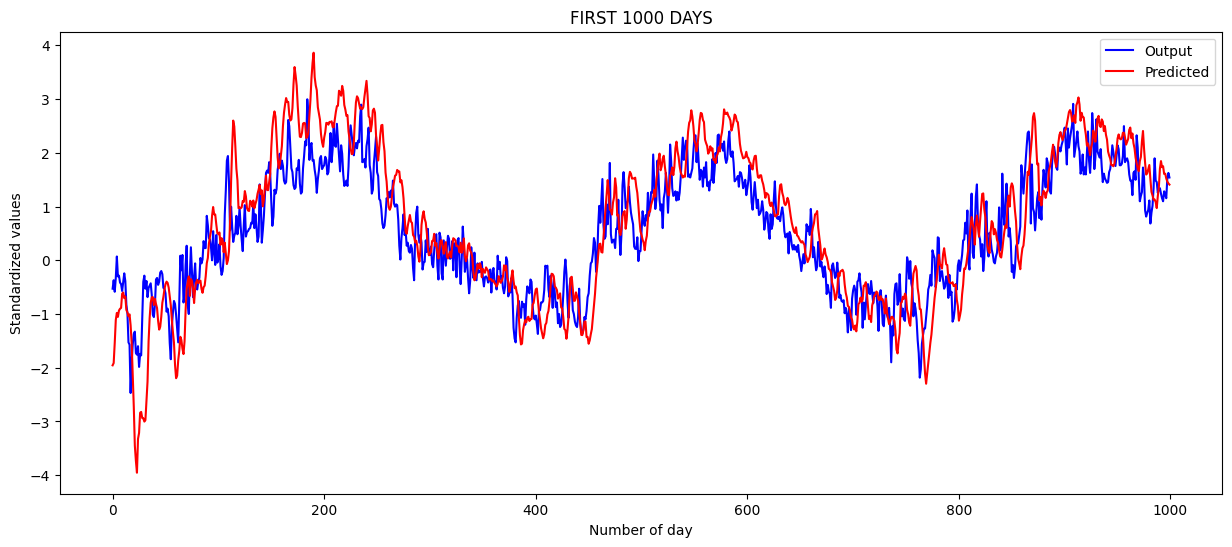

In [4]:
LENGHT = 1000

plt.figure(figsize=(15,6))
plt.title("FIRST 1000 DAYS")
plt.xlabel("Number of day")
plt.ylabel("Standardized values")

x = np.arange(LENGHT)
plt.plot(x, y_output[:LENGHT], 'b', label="Output")
plt.plot(x, y_pred[:LENGHT], 'r', label="Predicted")
plt.legend()
plt.show()

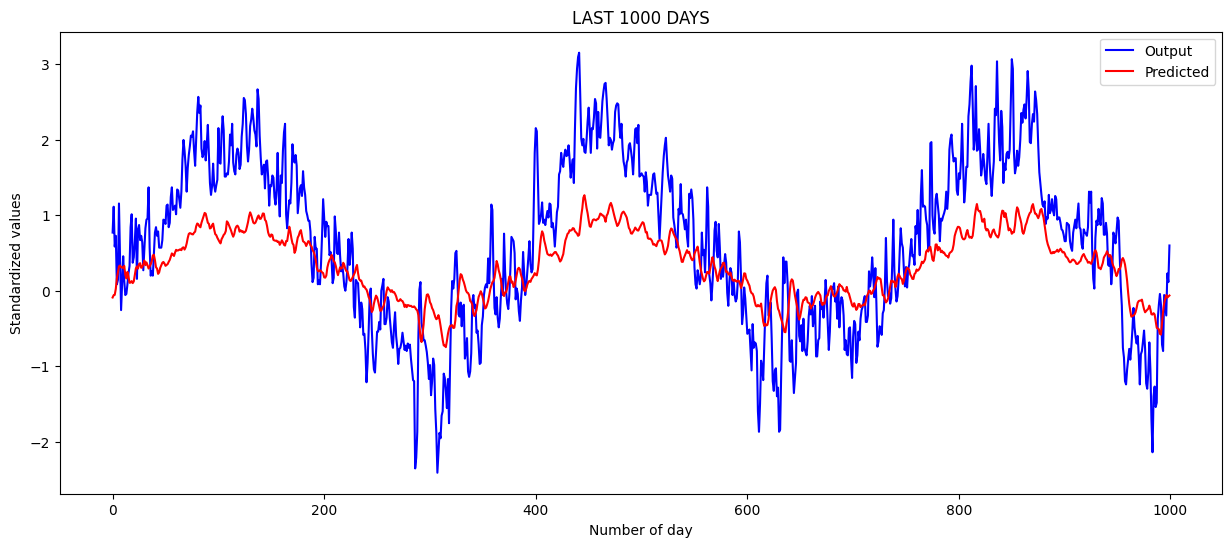

In [5]:
plt.figure(figsize=(15,6))
plt.title("LAST 1000 DAYS")
plt.xlabel("Number of day")
plt.ylabel("Standardized values")

x = np.arange(LENGHT)
plt.plot(x, y_output[-LENGHT:], 'b', label="Output")
plt.plot(x, y_pred[-LENGHT:], 'r', label="Predicted")
plt.legend()
plt.show()

In [6]:
print(f"MSE: {network.mse(y_output, y_pred)}")
print(f"MAE: {network.mae(y_output, y_pred)}")

MSE: 0.5953311635301476
MAE: 0.6006928619092332


# Predicting value

In [7]:
x_test = np.array([7,5,4,4,6,7,10])
x_test = np.reshape(x_test, (1, np.shape(x_test)[0]))
x_test = standardize(x_test, x_train_org)
network.predict(x_test)
print(unstandardize(network.output, x_train_org))

[[5.39407214 4.83910481]]
